# ALL

In [12]:
# FCFS (First Come First Serve) Disk Scheduling

def fcfs(requests, head):
    total_movement = 0
    current_position = head

    for request in requests:
        total_movement += abs(request - current_position)
        current_position = request

    return total_movement

# SSTF (Shortest Seek Time First) Disk Scheduling

def sstf(requests, head):
    total_movement = 0
    current_position = head
    local_requests = requests.copy()

    while local_requests:
        closest_request = min(local_requests, key=lambda x: abs(x - current_position))
        total_movement += abs(closest_request - current_position)
        current_position = closest_request
        local_requests.remove(closest_request)

    return total_movement

# SCAN (Elevator Algorithm) Disk Scheduling

def scan(requests, head, disk_size, direction="left"):
    total_movement = 0
    sorted_requests = sorted(requests)

    if direction == "left":
        sorted_requests = [0] + sorted_requests
    else:
        sorted_requests.append(disk_size - 1)

    current_position = head
    for request in sorted_requests:
        total_movement += abs(request - current_position)
        current_position = request

    return total_movement

# C-SCAN (Circular SCAN) Disk Scheduling

def c_scan(requests, head, disk_size):
    total_movement = 0
    sorted_requests = sorted(requests)

    right_side = [req for req in sorted_requests if req >= head]
    left_side = [req for req in sorted_requests if req < head]

    total_movement += sum(abs(head - req) for req in right_side)
    if left_side:
        total_movement += abs(disk_size - 1 - head)
        total_movement += abs(disk_size - 1 - left_side[0])
        total_movement += sum(abs(left_side[i] - left_side[i - 1]) for i in range(1, len(left_side)))

    return total_movement

# LOOK Disk Scheduling

def look(requests, head, direction="left"):
    total_movement = 0
    sorted_requests = sorted(requests)

    if direction == "left":
        left_side = [req for req in sorted_requests if req <= head]
        right_side = [req for req in sorted_requests if req > head]

        total_movement += sum(abs(head - req) for req in reversed(left_side))
        if right_side:
            total_movement += abs(left_side[0] - right_side[0])
            total_movement += sum(abs(right_side[i] - right_side[i - 1]) for i in range(1, len(right_side)))
    else:
        right_side = [req for req in sorted_requests if req >= head]
        left_side = [req for req in sorted_requests if req < head]

        total_movement += sum(abs(head - req) for req in right_side)
        if left_side:
            total_movement += abs(right_side[-1] - left_side[-1])
            total_movement += sum(abs(left_side[i] - left_side[i - 1]) for i in range(len(left_side) - 1, 0, -1))

    return total_movement

# C-LOOK Disk Scheduling

def c_look(requests, head):
    total_movement = 0
    sorted_requests = sorted(requests)

    right_side = [req for req in sorted_requests if req >= head]
    left_side = [req for req in sorted_requests if req < head]

    total_movement += sum(abs(head - req) for req in right_side)
    if left_side:
        total_movement += abs(right_side[-1] - left_side[0])
        total_movement += sum(abs(left_side[i] - left_side[i - 1]) for i in range(1, len(left_side)))

    return total_movement

# Örnek Kullanım
requests = [98, 183, 37, 122, 14, 124, 65, 67]
head = 53
disk_size = 200

total_fcfs = fcfs(requests, head)
total_sstf = sstf(requests, head)
total_scan = scan(requests, head, disk_size, direction="left")
total_cscan = c_scan(requests, head, disk_size)
total_look = look(requests, head, direction="left")
total_clook = c_look(requests, head)

print("FCFS Total Movement:", total_fcfs)
print("SSTF Total Movement:", total_sstf)
print("SCAN Total Movement:", total_scan)
print("C-SCAN Total Movement:", total_cscan)
print("LOOK Total Movement:", total_look)
print("C-LOOK Total Movement:", total_clook)


FCFS Total Movement: 640
SSTF Total Movement: 236
SCAN Total Movement: 236
C-SCAN Total Movement: 695
LOOK Total Movement: 224
C-LOOK Total Movement: 533


# FCFS

Total head movement: 640


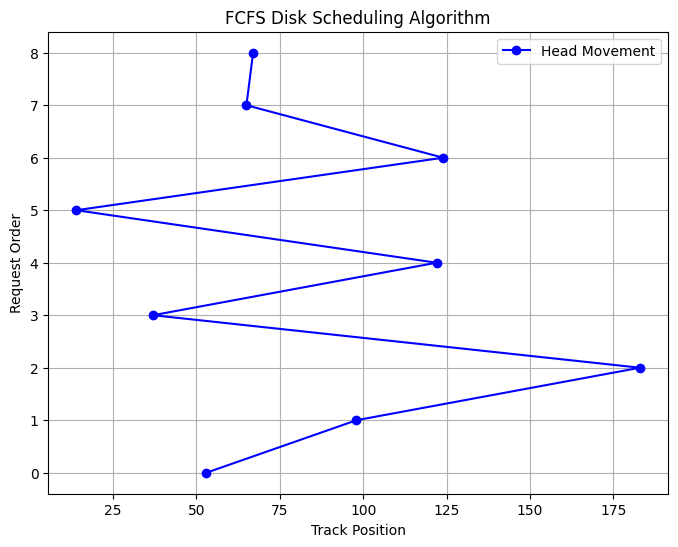

In [3]:
import matplotlib.pyplot as plt

def fcfs(requests, head):
    """
    First-Come, First-Served (FCFS) disk scheduling algorithm.

    Parameters:
    requests (list): List of disk track requests.
    head (int): Initial position of the disk head.

    Returns:
    int: Total head movement.
    """
    total_movement = 0
    current_position = head
    positions = [head]  # Store head movements for visualization

    for request in requests:
        total_movement += abs(request - current_position)
        current_position = request
        positions.append(request)

    return total_movement, positions

def plot_fcfs(requests, head):
    total_movement, positions = fcfs(requests, head)
    plt.figure(figsize=(8, 6))
    plt.plot(positions, range(len(positions)), marker='o', linestyle='-', color='b', label='Head Movement')
    plt.xlabel("Track Position")
    plt.ylabel("Request Order")
    plt.title("FCFS Disk Scheduling Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53
    total_movement, _ = fcfs(requests, head)
    print(f"Total head movement: {total_movement}")
    plot_fcfs(requests, head)

# SSTF

Total head movement (SSTF): 236


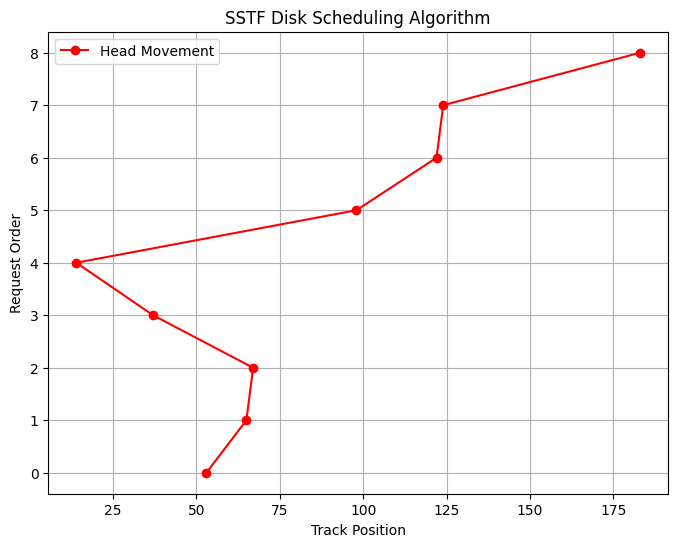

In [5]:
import matplotlib.pyplot as plt
def sstf(requests, head):
    """
    Shortest Seek Time First (SSTF) disk scheduling algorithm.

    Parameters:
    requests (list): List of disk track requests.
    head (int): Initial position of the disk head.

    Returns:
    int: Total head movement.
    """
    total_movement = 0
    current_position = head
    local_requests = requests.copy()
    positions = [head]  # Store head movements for visualization

    while local_requests:
        closest_request = min(local_requests, key=lambda x: abs(x - current_position))
        total_movement += abs(closest_request - current_position)
        current_position = closest_request
        positions.append(closest_request)
        local_requests.remove(closest_request)

    return total_movement, positions

def plot_sstf(requests, head):
    total_movement, positions = sstf(requests, head)
    plt.figure(figsize=(8, 6))
    plt.plot(positions, range(len(positions)), marker='o', linestyle='-', color='r', label='Head Movement')
    plt.xlabel("Track Position")
    plt.ylabel("Request Order")
    plt.title("SSTF Disk Scheduling Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53

    total_movement_sstf, _ = sstf(requests, head)
    print(f"Total head movement (SSTF): {total_movement_sstf}")
    plot_sstf(requests, head)

# SCAN

Total head movement (SCAN): 236


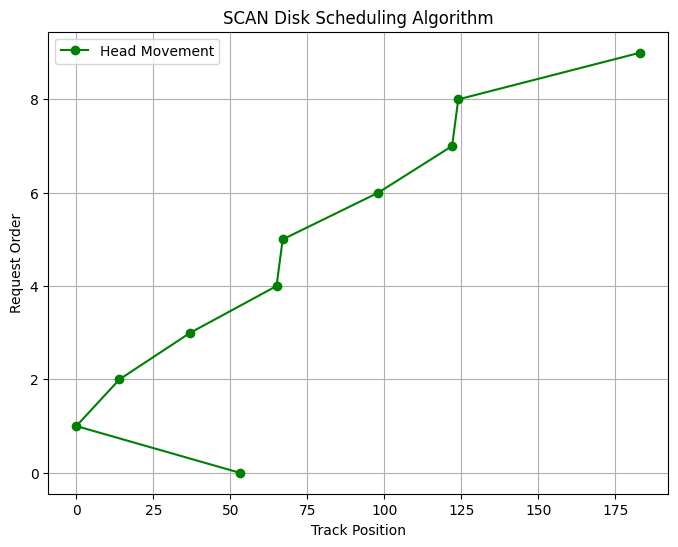

In [6]:
def scan(requests, head, disk_size, direction="left"):
    """
    SCAN (Elevator) disk scheduling algorithm.

    Parameters:
    requests (list): List of disk track requests.
    head (int): Initial position of the disk head.
    disk_size (int): Total size of the disk.
    direction (str): Movement direction ("left" or "right").

    Returns:
    int: Total head movement.
    """
    total_movement = 0
    sorted_requests = sorted(requests)
    positions = [head]

    if direction == "left":
        sorted_requests = [0] + sorted_requests
    else:
        sorted_requests.append(disk_size - 1)

    current_position = head
    for request in sorted_requests:
        total_movement += abs(request - current_position)
        current_position = request
        positions.append(request)

    return total_movement, positions

def plot_scan(requests, head, disk_size, direction="left"):
    total_movement, positions = scan(requests, head, disk_size, direction)
    plt.figure(figsize=(8, 6))
    plt.plot(positions, range(len(positions)), marker='o', linestyle='-', color='g', label='Head Movement')
    plt.xlabel("Track Position")
    plt.ylabel("Request Order")
    plt.title("SCAN Disk Scheduling Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53
    disk_size = 200

    total_movement_scan, _ = scan(requests, head, disk_size, "left")
    print(f"Total head movement (SCAN): {total_movement_scan}")
    plot_scan(requests, head, disk_size, "left")


# C-SCAN

Total head movement (C-SCAN): 354


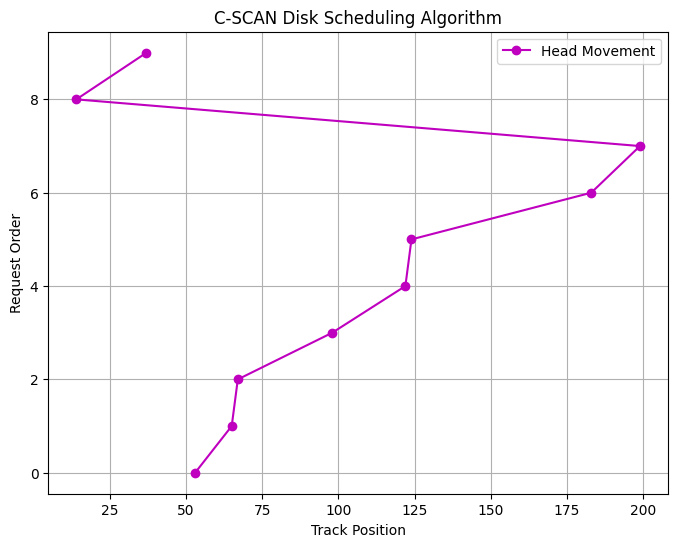

In [7]:
def c_scan(requests, head, disk_size):
    """
    C-SCAN (Circular SCAN) disk scheduling algorithm.

    Parameters:
    requests (list): List of disk track requests.
    head (int): Initial position of the disk head.
    disk_size (int): Total size of the disk.

    Returns:
    int: Total head movement.
    """
    total_movement = 0
    sorted_requests = sorted(requests)
    positions = [head]

    right_side = [req for req in sorted_requests if req >= head]
    left_side = [req for req in sorted_requests if req < head]

    for req in right_side:
        total_movement += abs(head - req)
        positions.append(req)
        head = req

    if left_side:
        total_movement += abs(disk_size - 1 - head)
        positions.append(disk_size - 1)
        head = 0
        total_movement += abs(disk_size - 1 - left_side[0])
        positions.append(left_side[0])
        head = left_side[0]
        for i in range(1, len(left_side)):
            total_movement += abs(left_side[i] - left_side[i - 1])
            positions.append(left_side[i])

    return total_movement, positions

def plot_c_scan(requests, head, disk_size):
    total_movement, positions = c_scan(requests, head, disk_size)
    plt.figure(figsize=(8, 6))
    plt.plot(positions, range(len(positions)), marker='o', linestyle='-', color='m', label='Head Movement')
    plt.xlabel("Track Position")
    plt.ylabel("Request Order")
    plt.title("C-SCAN Disk Scheduling Algorithm")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53
    disk_size = 200

    total_movement_c_scan, _ = c_scan(requests, head, disk_size)
    print(f"Total head movement (C-SCAN): {total_movement_c_scan}")
    plot_c_scan(requests, head, disk_size)


# LOOK

Total head movement (LOOK): 208


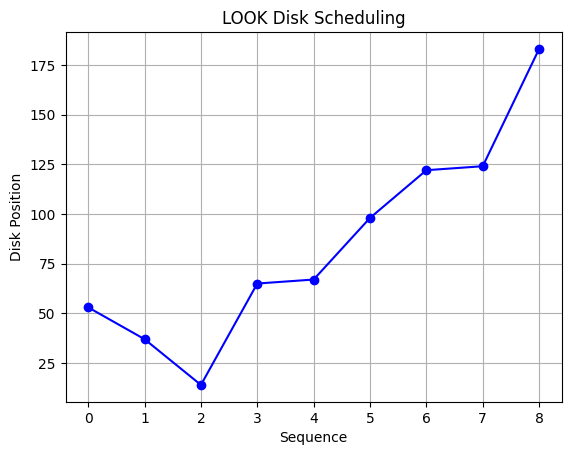

In [11]:
def look(requests, head, direction="left"):
    """
    LOOK disk scheduling algorithm.
    """
    total_movement = 0
    sorted_requests = sorted(requests)
    positions = [head]

    if direction == "left":
        left_side = [req for req in sorted_requests if req <= head]
        right_side = [req for req in sorted_requests if req > head]

        for req in reversed(left_side):
            total_movement += abs(head - req)
            positions.append(req)
            head = req

        if right_side:
            total_movement += abs(left_side[0] - right_side[0])
            positions.append(right_side[0])
            head = right_side[0]
            for i in range(1, len(right_side)):
                total_movement += abs(right_side[i] - right_side[i - 1])
                positions.append(right_side[i])
    else:
        right_side = [req for req in sorted_requests if req >= head]
        left_side = [req for req in sorted_requests if req < head]

        for req in right_side:
            total_movement += abs(head - req)
            positions.append(req)
            head = req

        if left_side:
            total_movement += abs(right_side[-1] - left_side[-1])
            positions.append(left_side[-1])
            head = left_side[-1]
            for i in range(len(left_side) - 2, -1, -1):
                total_movement += abs(left_side[i] - left_side[i + 1])
                positions.append(left_side[i])

    return total_movement, positions

def plot_schedule(positions, title):
    """
    Function to visualize disk scheduling movements.
    """
    plt.plot(range(len(positions)), positions, marker='o', linestyle='-', color='b')
    plt.xlabel("Sequence")
    plt.ylabel("Disk Position")
    plt.title(title)
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53
    disk_size = 200

    total_movement_look, positions_look = look(requests, head)
    print(f"Total head movement (LOOK): {total_movement_look}")
    plot_schedule(positions_look, "LOOK Disk Scheduling")

# C-LOOK

Total head movement (C-LOOK): 322


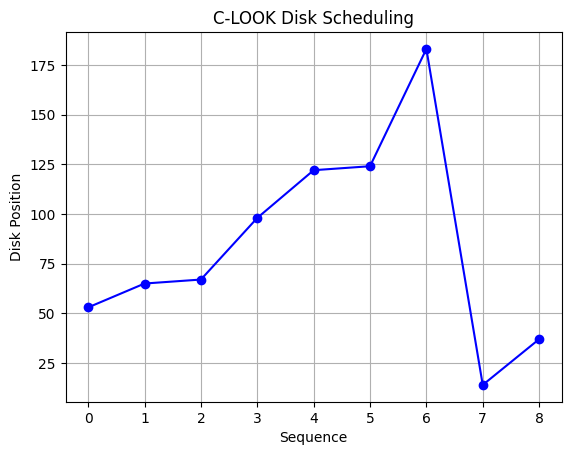

In [13]:
def c_look(requests, head):
    """
    C-LOOK disk scheduling algorithm.
    """
    total_movement = 0
    sorted_requests = sorted(requests)
    positions = [head]

    right_side = [req for req in sorted_requests if req >= head]
    left_side = [req for req in sorted_requests if req < head]

    for req in right_side:
        total_movement += abs(head - req)
        positions.append(req)
        head = req

    if left_side:
        total_movement += abs(right_side[-1] - left_side[0])
        positions.append(left_side[0])
        head = left_side[0]
        for i in range(1, len(left_side)):
            total_movement += abs(left_side[i] - left_side[i - 1])
            positions.append(left_side[i])

    return total_movement, positions

def plot_schedule(positions, title):
    """
    Function to visualize disk scheduling movements.
    """
    plt.plot(range(len(positions)), positions, marker='o', linestyle='-', color='b')
    plt.xlabel("Sequence")
    plt.ylabel("Disk Position")
    plt.title(title)
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    requests = [98, 183, 37, 122, 14, 124, 65, 67]
    head = 53
    disk_size = 200

    total_movement_c_look, positions_c_look = c_look(requests, head)
    print(f"Total head movement (C-LOOK): {total_movement_c_look}")
    plot_schedule(positions_c_look, "C-LOOK Disk Scheduling")